C:\Users\Haani\AppData\Local\Temp\ipykernel_9084\3372281610.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


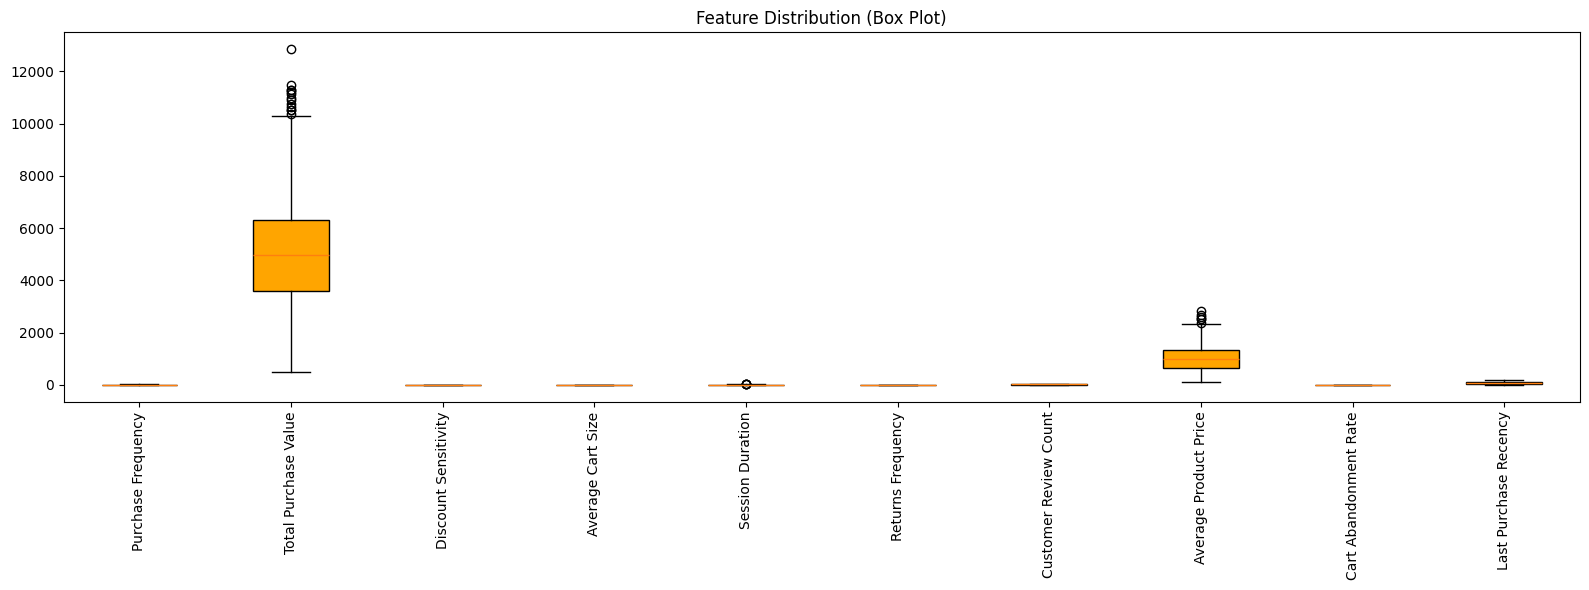

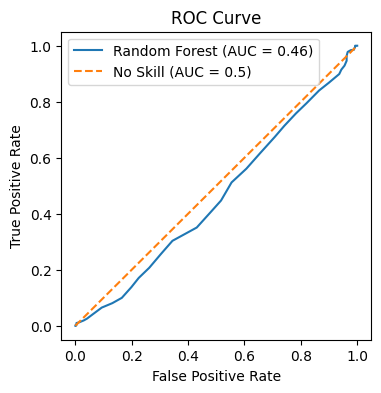

AUC: 0.45850565939495064


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

# -----------------------------
# Load Excel dataset
# -----------------------------
df = pd.read_excel("ML470_S5_RetailSales_Data_Practice.xlsx")

# -----------------------------
# Separate target
# -----------------------------
y = df["Purchase Likelihood"]
X = df.drop("Purchase Likelihood", axis=1)

# -----------------------------
# Keep only numeric columns for boxplot
# -----------------------------
X_numeric = X.select_dtypes(include=["int64", "float64"])

# -----------------------------
# Box Plot (FIXED)
# -----------------------------
plt.figure(figsize=(16,6))
plt.boxplot(
    X_numeric.values,
    labels=X_numeric.columns,
    patch_artist=True,
    boxprops=dict(facecolor="orange"),
    flierprops=dict(marker='o')
)
plt.xticks(rotation=90)
plt.title("Feature Distribution (Box Plot)")
plt.tight_layout()
plt.show()

# -----------------------------
# Encode categorical columns
# -----------------------------
X_encoded = pd.get_dummies(X, drop_first=True)

# -----------------------------
# Train model
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42
)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# -----------------------------
# ROC Curve
# -----------------------------
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(4,4))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], linestyle="--", label="No Skill (AUC = 0.5)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print("AUC:", roc_auc)
